In [6]:
#NOTE: ALL ANSWERS INVOLVING TOTAL SALES ASSUMES THAT THE PRICE COLUMN PERTAINS TO A SINGLE QUANTITY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")
invoices.head()


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [12]:
customers.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [53]:
#1 (EASY) How many unique customers are in the dataset?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")
print('EASY #1')
unique_customers = invoices['customer_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

EASY #1
Number of unique customers: 5191


In [18]:
#2 (EASY) What are the different categories of products available? How many unique categories are there?

print('EASY #2')
categories = invoices['category'].unique()
print(f"Different categories: { ', '.join(categories)}")
print(f"Number of categories: {invoices['category'].nunique()}")

EASY #2
Different categories: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
Number of categories: 8


In [19]:
#3 (EASY) Which payment method is the most popular? How many times was it used?

print('EASY #3')
payment_column = 'payment_method'
if payment_column in invoices.columns:
    payment_counts = invoices[payment_column].value_counts()
    most_popular = payment_counts.idxmax()
    count = payment_counts.max()
print(f"The most popular payment method is {most_popular} it was used {count} times.")

EASY #3
The most popular payment method is Cash it was used 44447 times.


In [26]:
#NOTE: ALL ANSWERS INVOLVING TOTAL SALES ASSUMES THAT THE PRICE COLUMN PERTAINS TO A SINGLE QUANTITY
#1 (MEDIUM) What are the three most popular categories, by total sales?

invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")
print('MEDIUM #1')

invoices['total_sales'] = (invoices['quantity']*invoices['price'])
grouped = invoices.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
result = ' , '.join(grouped.index)
print(f"1. The three most popular categories by total sales are: {result}")

MEDIUM #1
1. The three most popular categories by total sales are: Clothing , Shoes , Technology


In [50]:
#NOTE: ALL ANSWERS INVOLVING TOTAL SALES ASSUMES THAT THE PRICE COLUMN PERTAINS TO A SINGLE QUANTITY
#2 (MEDIUM) What are the total sales attributed to customers over the age of 45?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")
print('MEDIUM #2')
rename_id = customers.rename(columns={'id': 'customer_id'})

customers_over_45 = rename_id[rename_id['age']>45]
sales_customers = customers_over_45.merge(invoices, on='customer_id', how='inner')
sales_customers = sales_customers[sales_customers['price'].notnull()]
sales_customers = sales_customers[sales_customers['quantity'].notnull()]
total_sales = (sales_customers['price']*sales_customers['quantity']).sum()
print(f"2. The total sales attributed to customers over the age of 45 is {total_sales}")

MEDIUM #2
2. The total sales attributed to customers over the age of 45 is 82039768.14999999


MEDIUM #3


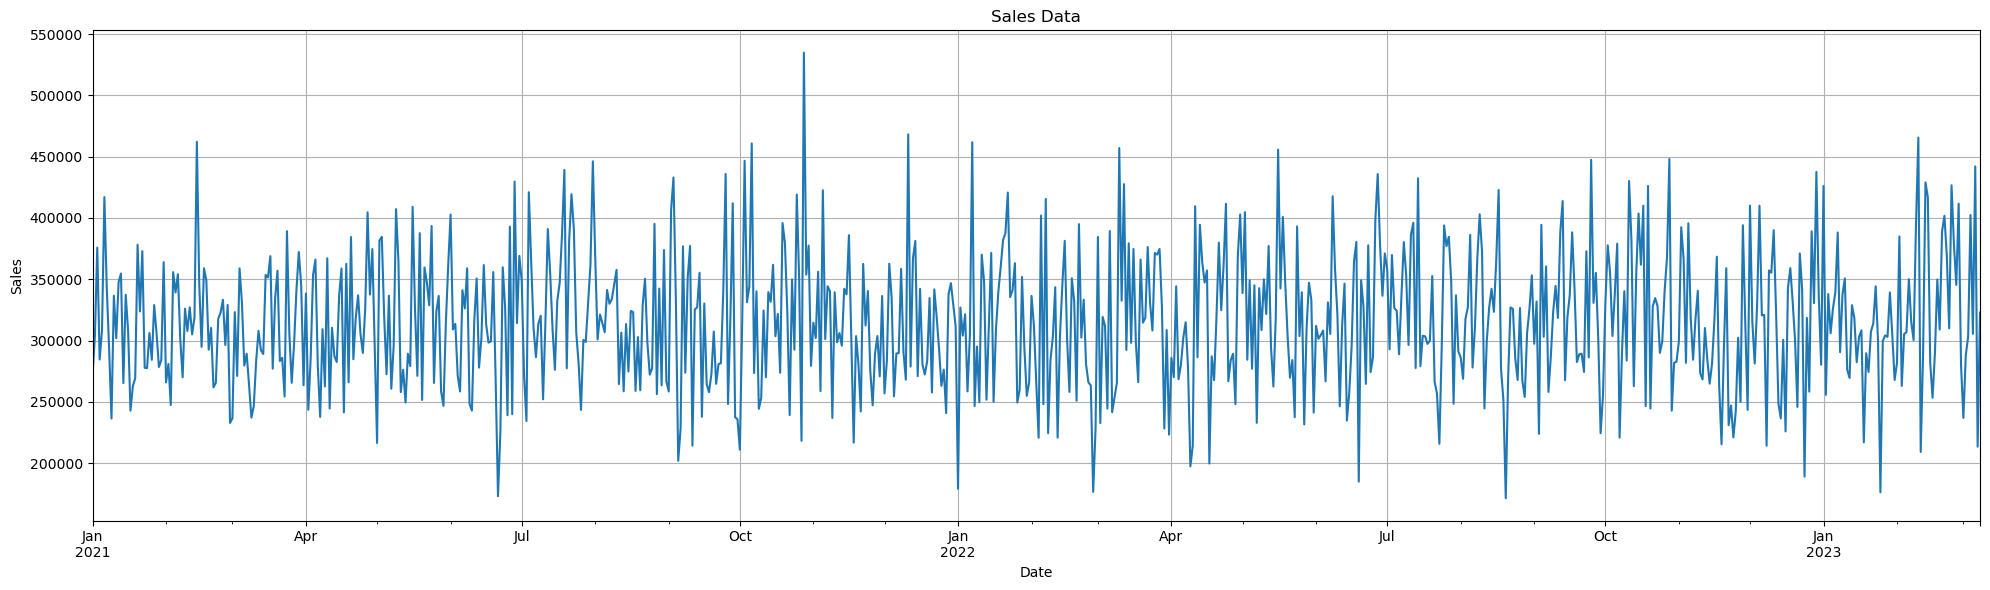

Analysis:
The data shows a significant fluctuation in daily sales across all months with frequent peaks and dips. There does not seem to be a seasonal pattern, since sales figures consistently fluctuate all throughout the year. There is, however, about an instance per quarter where the sales figures reach an impressive peak that dominates the figures in the rest of the months.


In [19]:
#NOTE: ALL ANSWERS INVOLVING TOTAL SALES ASSUMES THAT THE PRICE COLUMN PERTAINS TO A SINGLE QUANTITY
#3. (MEDIUM) How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")
print('MEDIUM #3')
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)
index_date = invoices.set_index(invoices['invoice_date'])
invoices['total_sale'] = (invoices['price'] * invoices['quantity'])
data_period = invoices['invoice_date']
daily_sales = invoices.groupby('invoice_date')['total_sale'].sum()

x = invoices['invoice_date']
y = daily_sales

plt.figure(figsize=(20, 6))
daily_sales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data')
plt.tight_layout()
plt.grid(True) 
plt.show()

print("Analysis:")
print('The data shows a significant fluctuation in daily sales across all months with frequent peaks and dips. There does not seem to be a seasonal pattern, since sales figures consistently fluctuate all throughout the year. There is, however, about an instance per quarter where the sales figures reach an impressive peak that dominates the figures in the rest of the months.')

In [54]:
#NOTE: ALL ANSWERS INVOLVING TOTAL SALES ASSUMES THAT THE PRICE COLUMN PERTAINS TO A SINGLE QUANTITY
#1 (HARD) 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
invoices = pd.read_csv(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\Gabby Libunao\OneDrive\Desktop\ATENEO\2ND YR\Intersession\ITMGT\dim_customer.json")

#merge the two tables; get the sales and ages'
rename_id = customers.rename(columns={'id': 'customer_id'})
merged_df = pd.merge( left = rename_id, right = invoices, on='customer_id', how='outer')

merged_df['age group'] = pd.cut(merged_df['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], labels = ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109'])                                                                                                          
merged_df['total sales'] = merged_df['price']*merged_df['quantity']
pivot_table = pd.pivot_table(merged_df, values = 'total sales', index = 'category', columns = 'age group', aggfunc = "sum", observed=False)
pivot_table

age group,1-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100-109
category,,,,,,,,,,,
Books,0.0,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95,0.0,0.0
Clothing,0.0,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04,0.0,0.0
Cosmetics,0.0,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80,0.0,0.0
Food & Beverage,0.0,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12,0.0,0.0
Shoes,0.0,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97,0.0,0.0
Souvenir,0.0,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25,0.0,0.0
Technology,0.0,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00,0.0,0.0
Toys,0.0,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00,0.0,0.0
